In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Use the session to query Measurement table and display the first 5 stations
for row in session.query(Measurement, Measurement.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x0000029F018DC748>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000029F018DC400>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000029F018DC710>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000029F018DCE10>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000029F018DCDD8>, 'USC00519397')


In [14]:
# Use the session to query Station table and display the first 5 stations
for row in session.query(Station, Station.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x0000029F018817F0>, 'USC00519397')
(<sqlalchemy.ext.automap.station object at 0x0000029F018816A0>, 'USC00513117')
(<sqlalchemy.ext.automap.station object at 0x0000029F018816D8>, 'USC00514830')
(<sqlalchemy.ext.automap.station object at 0x0000029F018819E8>, 'USC00517948')
(<sqlalchemy.ext.automap.station object at 0x0000029F018C67F0>, 'USC00518838')


In [15]:
# Query and print the number of unique stations in Measurement
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [16]:
# Query and print the number of unique stations in Station
locations = session.query(Station).group_by(Station.station).count()
print(locations)

9


In [17]:
# Use the session to query Measurement table and display the stations
for row in session.query(Measurement, Measurement.station):
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x0000025831D63C18>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D63EF0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D63FD0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D63BA8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D93E10>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D93588>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D938D0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D93F28>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D93940>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D93908>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831D93A58>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x0000025831DB2AC8>, 'USC00519397')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2630>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B26D8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2780>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2828>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B28D0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2978>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2A20>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2AC8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2B70>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2C18>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2CC0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x00000258327B2D68>, 'USC00519397')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10630>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A106D8>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10780>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10828>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A108D0>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10978>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10A20>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10AC8>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10B70>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10C18>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10CC0>, 'USC00513117')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833A10D68>, 'USC00513117')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x0000025833C0CD68>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C0CE10>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C0CEB8>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C0CF60>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C14048>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C140F0>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C14198>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C14240>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C142E8>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C14390>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C14438>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833C144E0>, 'USC00514830')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x0000025833E706D8>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70780>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70828>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E708D0>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70978>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70A20>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70AC8>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70B70>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70C18>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70CC0>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70D68>, 'USC00514830')
(<sqlalchemy.ext.automap.measurement object at 0x0000025833E70E10>, 'USC00514830')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3588>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3630>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B36D8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3780>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3828>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B38D0>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3978>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3A20>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3AC8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3B70>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3C18>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258341B3CC0>, 'USC00519523')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000002583444AA20>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000002583444AAC8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000002583444AB70>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000002583444AC18>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000002583444ACC0>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000002583444AD68>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000002583444AE10>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000002583444AEB8>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x000002583444AF60>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834453048>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x00000258344530F0>, 'USC00519523')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834453198>, 'USC00519523')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x000002583467E780>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467E828>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467E8D0>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467E978>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467EA20>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467EAC8>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467EB70>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467EC18>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467ECC0>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467ED68>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467EE10>, 'USC00519281')
(<sqlalchemy.ext.automap.measurement object at 0x000002583467EEB8>, 'USC00519281')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE0F0>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE198>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE240>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE2E8>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE390>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE438>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE4E0>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE588>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE630>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE6D8>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE780>, 'USC00511918')
(<sqlalchemy.ext.automap.measurement object at 0x00000258348DE828>, 'USC00511918')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B438>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B4E0>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B588>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B630>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B6D8>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B780>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B828>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B8D0>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5B978>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5BA20>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5BAC8>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834B5BB70>, 'USC00516128')
(<sq

(<sqlalchemy.ext.automap.measurement object at 0x0000025834D904E0>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90588>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90630>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D906D8>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90780>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90828>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D908D0>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90978>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90A20>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90AC8>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90B70>, 'USC00516128')
(<sqlalchemy.ext.automap.measurement object at 0x0000025834D90C18>, 'USC00516128')
(<sq

In [18]:
# Use the session to query Station table and display the stations
for row in session.query(Station, Station.station):
    print(row)

(<sqlalchemy.ext.automap.station object at 0x0000025831D93EB8>, 'USC00519397')
(<sqlalchemy.ext.automap.station object at 0x0000025831D93F28>, 'USC00513117')
(<sqlalchemy.ext.automap.station object at 0x0000025831D93940>, 'USC00514830')
(<sqlalchemy.ext.automap.station object at 0x0000025831D93208>, 'USC00517948')
(<sqlalchemy.ext.automap.station object at 0x0000025831D93908>, 'USC00518838')
(<sqlalchemy.ext.automap.station object at 0x0000025831D93630>, 'USC00519523')
(<sqlalchemy.ext.automap.station object at 0x0000025831D93668>, 'USC00519281')
(<sqlalchemy.ext.automap.station object at 0x0000025831D93FD0>, 'USC00511918')
(<sqlalchemy.ext.automap.station object at 0x0000025831DC4160>, 'USC00516128')


#  Columns in Measurement table are:  
id INTEGER  
 station TEXT  
 date TEXT  
 prcp FLOAT  
 tobs FLOAT  

In [25]:
for row in session.query(Measurement.id, Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs).all():
    print(row)

(1, '2010-01-01', 'USC00519397', 0.08, 65.0)
(2, '2010-01-02', 'USC00519397', 0.0, 63.0)
(3, '2010-01-03', 'USC00519397', 0.0, 74.0)
(4, '2010-01-04', 'USC00519397', 0.0, 76.0)
(5, '2010-01-06', 'USC00519397', None, 73.0)
(6, '2010-01-07', 'USC00519397', 0.06, 70.0)
(7, '2010-01-08', 'USC00519397', 0.0, 64.0)
(8, '2010-01-09', 'USC00519397', 0.0, 68.0)
(9, '2010-01-10', 'USC00519397', 0.0, 73.0)
(10, '2010-01-11', 'USC00519397', 0.01, 64.0)
(11, '2010-01-12', 'USC00519397', 0.0, 61.0)
(12, '2010-01-14', 'USC00519397', 0.0, 66.0)
(13, '2010-01-15', 'USC00519397', 0.0, 65.0)
(14, '2010-01-16', 'USC00519397', 0.0, 68.0)
(15, '2010-01-17', 'USC00519397', 0.0, 64.0)
(16, '2010-01-18', 'USC00519397', 0.0, 72.0)
(17, '2010-01-19', 'USC00519397', 0.0, 66.0)
(18, '2010-01-20', 'USC00519397', 0.0, 66.0)
(19, '2010-01-21', 'USC00519397', 0.0, 69.0)
(20, '2010-01-22', 'USC00519397', 0.0, 67.0)
(21, '2010-01-23', 'USC00519397', 0.0, 67.0)
(22, '2010-01-24', 'USC00519397', 0.01, 71.0)
(23, '2010-01-

(2137, '2016-01-09', 'USC00519397', 0.03, 75.0)
(2138, '2016-01-10', 'USC00519397', 0.01, 66.0)
(2139, '2016-01-11', 'USC00519397', 0.0, 68.0)
(2140, '2016-01-12', 'USC00519397', 0.0, 64.0)
(2141, '2016-01-13', 'USC00519397', 0.0, 64.0)
(2142, '2016-01-14', 'USC00519397', 0.0, 64.0)
(2143, '2016-01-15', 'USC00519397', 0.0, 69.0)
(2144, '2016-01-16', 'USC00519397', 0.01, 65.0)
(2145, '2016-01-17', 'USC00519397', 0.0, 64.0)
(2146, '2016-01-18', 'USC00519397', 0.0, 64.0)
(2147, '2016-01-19', 'USC00519397', 0.0, 63.0)
(2148, '2016-01-20', 'USC00519397', 0.0, 68.0)
(2149, '2016-01-21', 'USC00519397', 0.0, 71.0)
(2150, '2016-01-22', 'USC00519397', 0.0, 70.0)
(2151, '2016-01-23', 'USC00519397', 0.0, 70.0)
(2152, '2016-01-24', 'USC00519397', 0.0, 70.0)
(2153, '2016-01-25', 'USC00519397', 0.04, 71.0)
(2154, '2016-01-26', 'USC00519397', 0.16, 68.0)
(2155, '2016-01-27', 'USC00519397', 0.01, 68.0)
(2156, '2016-01-28', 'USC00519397', 0.0, 65.0)
(2157, '2016-01-29', 'USC00519397', 0.0, 67.0)
(2158, 

(3909, '2013-04-22', 'USC00513117', 0.44, 70.0)
(3910, '2013-04-23', 'USC00513117', 0.37, 74.0)
(3911, '2013-04-24', 'USC00513117', 0.76, 67.0)
(3912, '2013-04-25', 'USC00513117', 0.94, 70.0)
(3913, '2013-04-26', 'USC00513117', 0.0, 72.0)
(3914, '2013-04-27', 'USC00513117', 0.0, 70.0)
(3915, '2013-04-28', 'USC00513117', 0.0, 68.0)
(3916, '2013-04-29', 'USC00513117', 0.0, 74.0)
(3917, '2013-04-30', 'USC00513117', 0.0, 70.0)
(3918, '2013-05-01', 'USC00513117', 0.04, 73.0)
(3919, '2013-05-02', 'USC00513117', 0.0, 73.0)
(3920, '2013-05-03', 'USC00513117', 0.0, 72.0)
(3921, '2013-05-04', 'USC00513117', 0.0, 70.0)
(3922, '2013-05-05', 'USC00513117', 1.05, 72.0)
(3923, '2013-05-06', 'USC00513117', 0.09, 69.0)
(3924, '2013-05-07', 'USC00513117', 0.0, 66.0)
(3925, '2013-05-08', 'USC00513117', 0.0, 69.0)
(3926, '2013-05-09', 'USC00513117', 0.0, 70.0)
(3927, '2013-05-10', 'USC00513117', 0.1, 70.0)
(3928, '2013-05-11', 'USC00513117', 0.09, 74.0)
(3929, '2013-05-12', 'USC00513117', 0.22, 68.0)
(393

(5784, '2011-03-16', 'USC00514830', 0.0, 71.0)
(5785, '2011-03-17', 'USC00514830', 0.07, 72.0)
(5786, '2011-03-18', 'USC00514830', 0.1, 70.0)
(5787, '2011-03-19', 'USC00514830', 0.14, 71.0)
(5788, '2011-03-21', 'USC00514830', None, 71.0)
(5789, '2011-03-22', 'USC00514830', 0.04, 71.0)
(5790, '2011-03-23', 'USC00514830', 0.0, 70.0)
(5791, '2011-03-24', 'USC00514830', 0.15, 72.0)
(5792, '2011-03-26', 'USC00514830', None, 68.0)
(5793, '2011-03-28', 'USC00514830', None, 71.0)
(5794, '2011-03-29', 'USC00514830', 0.0, 72.0)
(5795, '2011-03-30', 'USC00514830', 0.0, 72.0)
(5796, '2011-03-31', 'USC00514830', 0.0, 75.0)
(5797, '2011-04-01', 'USC00514830', 0.35, 71.0)
(5798, '2011-04-04', 'USC00514830', None, 72.0)
(5799, '2011-04-05', 'USC00514830', 0.0, 71.0)
(5800, '2011-04-06', 'USC00514830', 0.0, 70.0)
(5801, '2011-04-07', 'USC00514830', 0.59, 67.0)
(5802, '2011-04-08', 'USC00514830', 0.31, 69.0)
(5803, '2011-04-10', 'USC00514830', None, 74.0)
(5804, '2011-04-11', 'USC00514830', 0.0, 72.0)
(

(7954, '2011-10-28', 'USC00517948', None, 74.0)
(7955, '2011-11-03', 'USC00517948', None, 75.0)
(7956, '2011-11-04', 'USC00517948', None, 74.0)
(7957, '2011-11-07', 'USC00517948', None, 74.0)
(7958, '2011-11-08', 'USC00517948', 0.08, 76.0)
(7959, '2011-11-09', 'USC00517948', 0.17, 74.0)
(7960, '2011-11-10', 'USC00517948', 0.1, 76.0)
(7961, '2011-11-14', 'USC00517948', None, 76.0)
(7962, '2011-11-15', 'USC00517948', None, 71.0)
(7963, '2011-11-16', 'USC00517948', None, 71.0)
(7964, '2011-11-17', 'USC00517948', 0.0, 74.0)
(7965, '2011-11-18', 'USC00517948', 0.0, 73.0)
(7966, '2011-11-21', 'USC00517948', 0.0, 74.0)
(7967, '2011-11-22', 'USC00517948', None, 73.0)
(7968, '2011-11-23', 'USC00517948', None, 75.0)
(7969, '2011-11-28', 'USC00517948', None, 70.0)
(7970, '2011-11-29', 'USC00517948', 0.0, 72.0)
(7971, '2011-11-30', 'USC00517948', 0.12, 72.0)
(7972, '2011-12-01', 'USC00517948', 0.0, 69.0)
(7973, '2011-12-02', 'USC00517948', 0.0, 69.0)
(7974, '2011-12-05', 'USC00517948', 0.0, 71.0)


(9597, '2010-03-20', 'USC00519523', 0.0, 71.0)
(9598, '2010-03-21', 'USC00519523', 0.0, 70.0)
(9599, '2010-03-22', 'USC00519523', 0.0, 73.0)
(9600, '2010-03-23', 'USC00519523', 0.0, 67.0)
(9601, '2010-03-24', 'USC00519523', 0.01, 77.0)
(9602, '2010-03-25', 'USC00519523', 0.12, 73.0)
(9603, '2010-03-26', 'USC00519523', 0.02, 74.0)
(9604, '2010-03-27', 'USC00519523', 0.02, 77.0)
(9605, '2010-03-28', 'USC00519523', 0.05, 76.0)
(9606, '2010-03-29', 'USC00519523', 0.0, 73.0)
(9607, '2010-03-30', 'USC00519523', 0.01, 73.0)
(9608, '2010-03-31', 'USC00519523', 0.0, 73.0)
(9609, '2010-04-01', 'USC00519523', 0.03, 72.0)
(9610, '2010-04-02', 'USC00519523', 0.0, 72.0)
(9611, '2010-04-03', 'USC00519523', 0.19, 72.0)
(9612, '2010-04-04', 'USC00519523', 0.12, 72.0)
(9613, '2010-04-05', 'USC00519523', 0.1, 72.0)
(9614, '2010-04-06', 'USC00519523', 0.03, 73.0)
(9615, '2010-04-07', 'USC00519523', 0.2, 73.0)
(9616, '2010-04-08', 'USC00519523', 0.0, 73.0)
(9617, '2010-04-09', 'USC00519523', 0.0, 73.0)
(96

(10966, '2014-01-08', 'USC00519523', 0.0, 71.0)
(10967, '2014-01-09', 'USC00519523', 0.12, 70.0)
(10968, '2014-01-10', 'USC00519523', 0.01, 72.0)
(10969, '2014-01-11', 'USC00519523', 0.0, 75.0)
(10970, '2014-01-12', 'USC00519523', 0.0, 68.0)
(10971, '2014-01-13', 'USC00519523', 0.0, 66.0)
(10972, '2014-01-14', 'USC00519523', 0.44, 75.0)
(10973, '2014-01-15', 'USC00519523', 0.28, 72.0)
(10974, '2014-01-16', 'USC00519523', 0.3, 65.0)
(10975, '2014-01-17', 'USC00519523', 0.15, 66.0)
(10976, '2014-01-18', 'USC00519523', 0.13, 65.0)
(10977, '2014-01-19', 'USC00519523', 0.0, 70.0)
(10978, '2014-01-20', 'USC00519523', 0.17, 72.0)
(10979, '2014-01-21', 'USC00519523', 0.0, 72.0)
(10980, '2014-01-22', 'USC00519523', 0.31, 69.0)
(10981, '2014-01-24', 'USC00519523', None, 58.0)
(10982, '2014-01-25', 'USC00519523', 0.0, 72.0)
(10983, '2014-01-27', 'USC00519523', None, 67.0)
(10984, '2014-01-28', 'USC00519523', 0.44, 69.0)
(10985, '2014-01-29', 'USC00519523', 0.21, 69.0)
(10986, '2014-01-30', 'USC00

(12454, '2010-09-24', 'USC00519281', 0.0, 70.0)
(12455, '2010-09-25', 'USC00519281', 0.0, 75.0)
(12456, '2010-09-26', 'USC00519281', 0.0, 77.0)
(12457, '2010-09-27', 'USC00519281', 0.02, 68.0)
(12458, '2010-09-28', 'USC00519281', 0.0, 68.0)
(12459, '2010-09-29', 'USC00519281', 0.0, 68.0)
(12460, '2010-09-30', 'USC00519281', 0.44, 68.0)
(12461, '2010-10-01', 'USC00519281', 0.77, 71.0)
(12462, '2010-10-02', 'USC00519281', 1.15, 74.0)
(12463, '2010-10-03', 'USC00519281', 0.09, 78.0)
(12464, '2010-10-04', 'USC00519281', 0.08, 74.0)
(12465, '2010-10-05', 'USC00519281', 0.22, 75.0)
(12466, '2010-10-06', 'USC00519281', 0.16, 71.0)
(12467, '2010-10-07', 'USC00519281', 0.0, 69.0)
(12468, '2010-10-08', 'USC00519281', 0.0, 69.0)
(12469, '2010-10-09', 'USC00519281', 0.0, 79.0)
(12470, '2010-10-10', 'USC00519281', 0.05, 76.0)
(12471, '2010-10-11', 'USC00519281', 0.02, 75.0)
(12472, '2010-10-12', 'USC00519281', 0.0, 74.0)
(12473, '2010-10-13', 'USC00519281', 0.06, 71.0)
(12474, '2010-10-14', 'USC005

(14479, '2016-04-16', 'USC00519281', 0.06, 76.0)
(14480, '2016-04-17', 'USC00519281', 0.32, 71.0)
(14481, '2016-04-18', 'USC00519281', 0.83, 68.0)
(14482, '2016-04-19', 'USC00519281', 0.18, 67.0)
(14483, '2016-04-20', 'USC00519281', 0.06, 72.0)
(14484, '2016-04-21', 'USC00519281', 0.0, 73.0)
(14485, '2016-04-22', 'USC00519281', 0.07, 73.0)
(14486, '2016-04-23', 'USC00519281', 0.23, 75.0)
(14487, '2016-04-24', 'USC00519281', 0.21, 75.0)
(14488, '2016-04-25', 'USC00519281', 0.03, 74.0)
(14489, '2016-04-26', 'USC00519281', 0.01, 74.0)
(14490, '2016-04-27', 'USC00519281', 0.01, 74.0)
(14491, '2016-04-28', 'USC00519281', 0.04, 73.0)
(14492, '2016-04-29', 'USC00519281', 0.0, 74.0)
(14493, '2016-04-30', 'USC00519281', 0.1, 74.0)
(14494, '2016-05-01', 'USC00519281', 0.03, 75.0)
(14495, '2016-05-02', 'USC00519281', 0.12, 73.0)
(14496, '2016-05-03', 'USC00519281', 0.0, 74.0)
(14497, '2016-05-04', 'USC00519281', 0.31, 72.0)
(14498, '2016-05-05', 'USC00519281', 0.91, 68.0)
(14499, '2016-05-06', 'U

(16201, '2013-06-19', 'USC00511918', 0.0, 70.0)
(16202, '2013-06-20', 'USC00511918', 0.0, 69.0)
(16203, '2013-06-21', 'USC00511918', 0.05, 72.0)
(16204, '2013-06-22', 'USC00511918', 0.0, 79.0)
(16205, '2013-06-23', 'USC00511918', 0.0, 77.0)
(16206, '2013-06-24', 'USC00511918', 0.0, 70.0)
(16207, '2013-06-25', 'USC00511918', 0.02, 71.0)
(16208, '2013-06-26', 'USC00511918', 0.06, 67.0)
(16209, '2013-06-27', 'USC00511918', 0.0, 66.0)
(16210, '2013-06-28', 'USC00511918', 0.0, 78.0)
(16211, '2013-06-29', 'USC00511918', 0.08, 80.0)
(16212, '2013-06-30', 'USC00511918', 0.0, 80.0)
(16213, '2013-07-01', 'USC00511918', 0.0, 68.0)
(16214, '2013-07-02', 'USC00511918', 0.0, 72.0)
(16215, '2013-07-03', 'USC00511918', 0.04, 69.0)
(16216, '2013-07-04', 'USC00511918', 0.0, 78.0)
(16217, '2013-07-05', 'USC00511918', 0.0, 76.0)
(16218, '2013-07-06', 'USC00511918', 0.0, 79.0)
(16219, '2013-07-07', 'USC00511918', 0.0, 75.0)
(16220, '2013-07-08', 'USC00511918', 0.0, 70.0)
(16221, '2013-07-09', 'USC00511918'

(18206, '2013-09-03', 'USC00516128', 0.13, 71.0)
(18207, '2013-09-04', 'USC00516128', 0.06, 74.0)
(18208, '2013-09-05', 'USC00516128', 0.02, 75.0)
(18209, '2013-09-06', 'USC00516128', 0.0, 71.0)
(18210, '2013-09-07', 'USC00516128', 1.01, 71.0)
(18211, '2013-09-08', 'USC00516128', 0.18, 73.0)
(18212, '2013-09-09', 'USC00516128', 0.02, 74.0)
(18213, '2013-09-10', 'USC00516128', 0.01, 76.0)
(18214, '2013-09-11', 'USC00516128', 0.19, 76.0)
(18215, '2013-09-12', 'USC00516128', 0.0, 73.0)
(18216, '2013-09-13', 'USC00516128', 0.88, 71.0)
(18217, '2013-09-14', 'USC00516128', 0.98, 72.0)
(18218, '2013-09-15', 'USC00516128', 0.2, 75.0)
(18219, '2013-09-16', 'USC00516128', 0.0, 75.0)
(18220, '2013-09-17', 'USC00516128', 0.36, 71.0)
(18221, '2013-09-18', 'USC00516128', 0.62, 71.0)
(18222, '2013-09-19', 'USC00516128', 0.07, 72.0)
(18223, '2013-09-20', 'USC00516128', 0.0, 75.0)
(18224, '2013-09-21', 'USC00516128', 0.01, 74.0)
(18225, '2013-09-22', 'USC00516128', 0.22, 70.0)
(18226, '2013-09-23', 'US

# Columns in Station table are:    
 id INTEGER  
 station TEXT  
 name TEXT  
 latitude FLOAT  
 longitude FLOAT  
 elevation FLOAT  

In [18]:
for row in session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all():
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


  convert Measurement.date to date format  
  for row in session.query(Measurement.id, Measurement.date,Measurement.station, Measurement.prcp, Measurement.tobs).all():  
  Measurement['date'] = dt.datetime.strptime(Measurement['date'], "%Y-%m-%d").date()  
  start_date = dt.date.today() + dt.timedelta(-((365 * 2) + 18)) # ((365 * 2) + 18) days to correct for question  
  

# Exploratory Climate Analysis

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [17]:
# Calculate the date 1 year ago from the last data point in the database
start_date = dt.date(2017, 8, 22) + dt.timedelta(-((365 * 1) + 0)) # 748 = ((365 * 2) + 18) days to correct for question

year_ago = session.query(Measurement).\
    filter(Measurement.date > start_date).count()
    
print(f"{year_ago} records exist since: {start_date}")#.format())
start_date #check startdate

2230 records exist since: 2016-08-22


datetime.date(2016, 8, 22)

In [18]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > start_date).all()

# qRec = list(np.ravel(results))

results
# qRec

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
index, values = zip(*results)

df = pd.DataFrame({
    'values': values
}, index=pd.DatetimeIndex(index))

df

,values
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


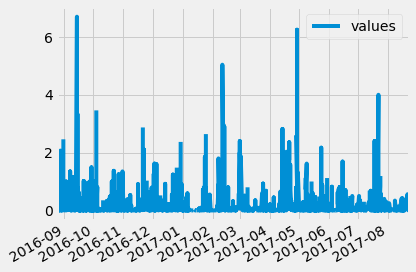

In [74]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(y='values')
plt.tight_layout()


![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,values
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
# Query and print the number of unique stations in Measurement
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [22]:
# Query and print the number of unique stations in Station
locations = session.query(Station).group_by(Station.station).count()
print(locations)

9


In [23]:
# Design a query to show how many stations are available in this dataset?
for row in session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all():
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [74]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# for row in session.query(Measurement.station).count:#.group_by(Measurement.station).all().count:
#     print(row)
    
for locations in session.query( Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()):
    print(locations)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
for locations in session.query( Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first():
    staActive = locations
    print(locations)

USC00519281
2772


In [25]:
for result2 in session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.tobs).filter(Measurement.station=='USC00519281').all():
    print(result2)

(54.0, 85.0, 71.66378066378067)


In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# [('USC00519281', 2772),

In [27]:
# Calculate the date 1 year ago from the last data point in the database
start_date = dt.date(2017, 8, 22) + dt.timedelta(-((365 * 1) + 0)) # 748 = ((365 * 2) + 18) days to correct for question

year_ago = session.query(Measurement).\
    filter(Measurement.date > start_date).count()
    
print(f"{year_ago} records exist since: {start_date}")#.format())
start_date #check startdate

2230 records exist since: 2016-08-22


datetime.date(2016, 8, 22)

In [28]:
results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > start_date).\
    filter(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').all()
results

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [29]:
index, values = zip(*results)

df = pd.DataFrame({
    'values': values
}, index=pd.DatetimeIndex(index))

df

,values
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0
2016-09-01,80.0


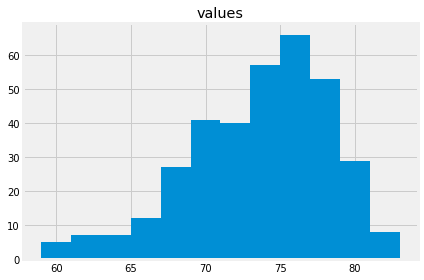

In [30]:
df.hist(bins=12)
plt.tight_layout()

![precipitation](Images/station-histogram.png)

In [47]:
start_dt = dt.date(2014,1,1)
end_dt = dt.date(2016,1,15)


results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(((Measurement.date >= start_dt) | (Measurement.date <= end_dt))).all()
print(results)



[(53.0, 73.09795396419437, 87.0)]


In [55]:
start_dt = dt.datetime.strftime(2016,1,1 %Y, %m, %d)
end_dt = dt.datetime.strftime(2016,1,1, %Y, %m, %d)


results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(((Measurement.date >= start_dt) | (Measurement.date <= end_dt))).all()
print(results)

SyntaxError: invalid syntax (<ipython-input-55-13466b6b24c3>, line 1)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


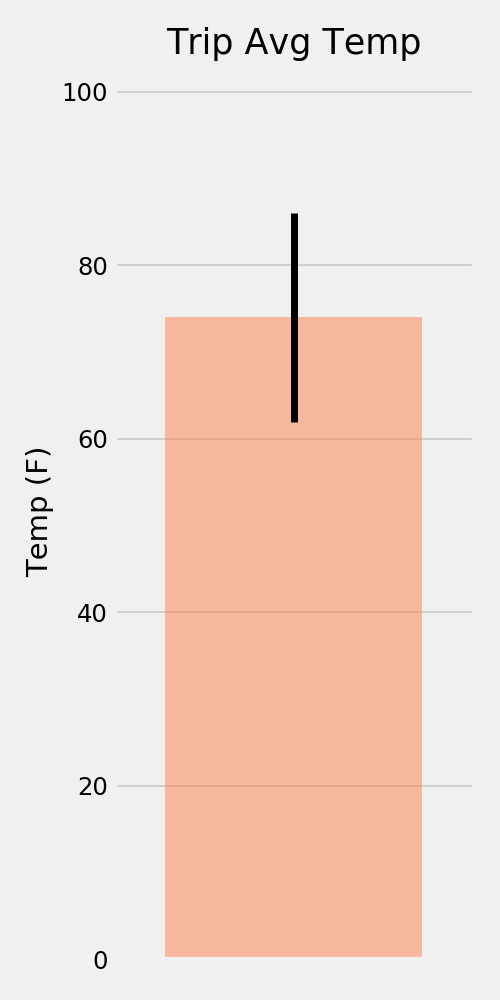

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


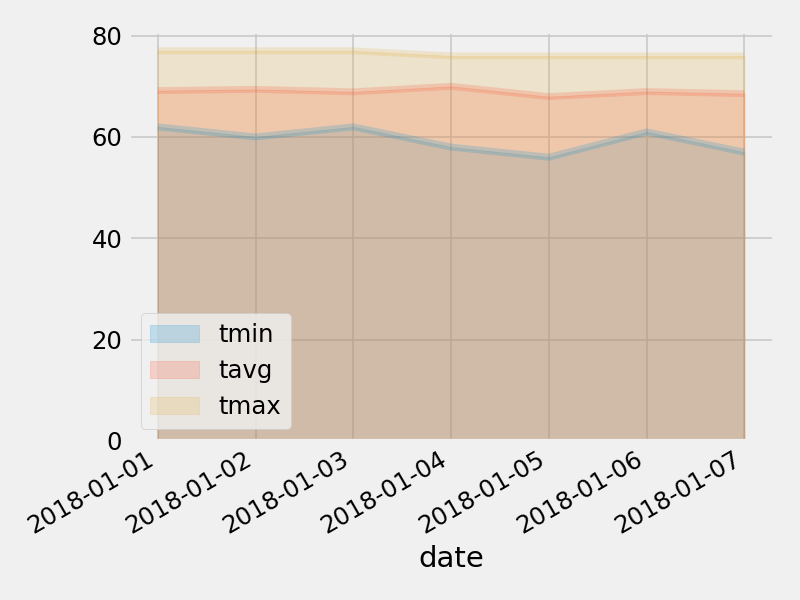

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
